### Packages & helper functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix

In [2]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)

In [3]:
def plot_cm(y_true, y_pred, figsize=(6,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

### 1 - Prepare data

In [5]:
data = pd.read_csv('k-means.csv')
data

,text,sentiment
0,Trời mưa khiến lòng mình buồn theo,negative
1,Dịch bệnh hoành hành khiến mình mất việc,negative
2,Vì đau chân nên mình phải từ bỏ sân cỏ,negative
3,Thật là một bộ phim xuất sắc,positive
4,Vô cùng vinh hạnh khi được tham dự lớp học này,positive
5,Dịch bệnh kéo dài lâu quá,negative
6,Trông cậu đáng yêu thật đấy,positive
7,Lòng vui sướng khi đạt học bổng học kì này,positive
8,Mưa nhiều nên quê mình mất mùa,negative
9,Đau lòng khi nghe mưa bão về,negative


### 2 - Apply TF-IDF on text

In [6]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["text"]).toarray()
vocab = vectorizer.get_feature_names()

### 3 - Cluster data by k-means

In [7]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 2, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int32)

In [8]:
data["kmeans_cluster"] = y_kmeans
data["kmeans_label"] = data.apply(lambda row: "negative" if row["kmeans_cluster"] == 1 else "positive", axis=1)
data

,text,sentiment,kmeans_cluster,kmeans_label
0,Trời mưa khiến lòng mình buồn theo,negative,0,positive
1,Dịch bệnh hoành hành khiến mình mất việc,negative,0,positive
2,Vì đau chân nên mình phải từ bỏ sân cỏ,negative,1,negative
3,Thật là một bộ phim xuất sắc,positive,1,negative
4,Vô cùng vinh hạnh khi được tham dự lớp học này,positive,0,positive
5,Dịch bệnh kéo dài lâu quá,negative,0,positive
6,Trông cậu đáng yêu thật đấy,positive,1,negative
7,Lòng vui sướng khi đạt học bổng học kì này,positive,0,positive
8,Mưa nhiều nên quê mình mất mùa,negative,0,positive
9,Đau lòng khi nghe mưa bão về,negative,0,positive


In [9]:
confusion_matrix(data["sentiment"], data["kmeans_label"])

array([[1, 5],
       [3, 2]])

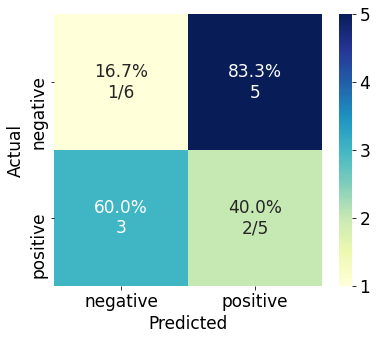

In [10]:
plot_cm(data["sentiment"], data["kmeans_label"])

### 4 - Cluster data by Hierarchy Agglomerative Clustering

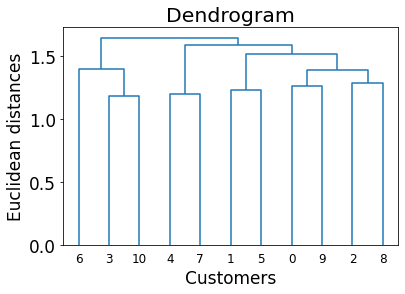

In [11]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hac

AgglomerativeClustering()

In [13]:
y_hac = hac.fit_predict(X)
y_hac

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [14]:
data["hac_cluster"] = y_hac
data["hac_label"] = data.apply(lambda row: "positive" if row["hac_cluster"] == 1 else "negative", axis=1)
data

,text,sentiment,kmeans_cluster,kmeans_label,hac_cluster,hac_label
0,Trời mưa khiến lòng mình buồn theo,negative,0,positive,0,negative
1,Dịch bệnh hoành hành khiến mình mất việc,negative,0,positive,0,negative
2,Vì đau chân nên mình phải từ bỏ sân cỏ,negative,1,negative,0,negative
3,Thật là một bộ phim xuất sắc,positive,1,negative,1,positive
4,Vô cùng vinh hạnh khi được tham dự lớp học này,positive,0,positive,0,negative
5,Dịch bệnh kéo dài lâu quá,negative,0,positive,0,negative
6,Trông cậu đáng yêu thật đấy,positive,1,negative,1,positive
7,Lòng vui sướng khi đạt học bổng học kì này,positive,0,positive,0,negative
8,Mưa nhiều nên quê mình mất mùa,negative,0,positive,0,negative
9,Đau lòng khi nghe mưa bão về,negative,0,positive,0,negative


In [15]:
confusion_matrix(data["sentiment"], data["hac_label"])

array([[6, 0],
       [2, 3]])

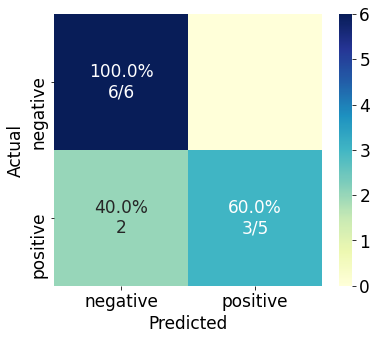

In [16]:
plot_cm(data["sentiment"], data["hac_label"])